# **STC: Builiding a recommendation Engine Powered by Similar User Preferences.**

## **objective:**


*   **Building a recommendation model based on the viewership of other users with similar preferences to enrich the viewing experience on STC TV.**
*   **Display the top 5 Recommendations for People Who Watched Moana.**





## **Jawwy dataset**
**The dataset consists of details about each customer and the movies and/or tv shows watched in addition to the genre.**

---------------------------------------------------------------------------------

In [21]:
!pip install pyxlsb

### **Import the required libraries**

In [22]:
import pyxlsb
import pandas as pd
import numpy as np
import seaborn as sns
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
#The warnings module provides functions for controlling warnings,
#such as ignoring them or turning them into exceptions.
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
#used to configure the Matplotlib plotting library for inline
#plotting and to set the default figure size, respectively.

In [23]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
file_path = "/content/drive/MyDrive/STC/stc TV Data Set_T3.xlsb"

# Read Excel file into DataFrame
df = pd.read_excel(file_path,engine='openpyxl',index_col=0)
df.head()

,user_id_maped,program_name,rating,date_,program_genre
0,26138,100 treets,1,2017-05-27,Drama
1,7946,Moana,1,2017-05-21,Animation
2,7418,The Mermaid Princess,1,2017-08-10,Animation
3,19307,The Mermaid Princess,2,2017-07-26,Animation
4,15860,Churchill,2,2017-07-07,Biography


### **Exploratory Data Analysis**


In [25]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   user_id_maped  1048575 non-null  int64         
 1   program_name   1048575 non-null  object        
 2   rating         1048575 non-null  int64         
 3   date_          1048575 non-null  datetime64[ns]
 4   program_genre  1048575 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 48.0+ MB


(1048575, 5)

In [26]:
df.dtypes

user_id_maped             int64
program_name             object
rating                    int64
date_            datetime64[ns]
program_genre            object
dtype: object

In [27]:
df.columns

Index(['user_id_maped', 'program_name', 'rating', 'date_', 'program_genre'], dtype='object')

In [28]:
#numerical variables
num = list(df.select_dtypes(include=['int64']).keys())
print(num)

['user_id_maped', 'rating']


In [29]:
#categorical variables
cat = list(df.select_dtypes(include='O').keys())
print(cat)

['program_name', 'program_genre']


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id_maped,1048575.0,17092.655895,10035.130858,1.0,8253.0,17149.0,25665.0,34280.0
rating,1048575.0,2.497283,1.119837,1.0,1.0,2.0,3.0,4.0


In [31]:
object_describe = df.describe(include='object').T
object_describe

,count,unique,top,freq
program_name,1048575,8013,The Boss Baby,24047
program_genre,1048575,16,Animation,401730


In [32]:
df.apply(pd.Series.nunique)

user_id_maped    11578
program_name      8013
rating               4
date_              411
program_genre       16
dtype: int64

In [33]:
#is there any dupilacted values?
if df.duplicated().any():
    print("yes")
else:
    print("No")

yes


In [34]:
#is there any missing values?
if df.isnull().sum().any():
 print("yes")
else:
    print("No")

No


In [35]:
# Pair-wise table for user rating for all movies
movie_features_df=df.pivot_table(index='program_name',columns='user_id_maped',values='rating').fillna(0)
movie_features_df.head()

user_id_maped,1,5,9,11,15,17,20,26,28,30,...,34259,34261,34263,34265,34267,34269,34271,34273,34277,34280
program_name,,,,,,,,,,,,,,,,,,,,,
#FollowFriday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Days in a Madhouse,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 treets,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102 Dalmatians,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
movie_features_df_matrix = csr_matrix(movie_features_df.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [38]:
movie_features_df_selection= movie_features_df.reset_index()
movie_features_df_selection[['program_name']]
df[['program_name']].head(10)

,program_name
0,100 treets
1,Moana
2,The Mermaid Princess
3,The Mermaid Princess
4,Churchill
5,Beavis And Butt-Head Do America
6,The Mermaid Princess
7,Coco
8,Kidnap
9,The Accountant


In [39]:
# show the recommendations (top 5)
program_name='Moana'
recomendations=5

query_index = np.random.choice(movie_features_df.shape[0])
distances, indices = model_knn.kneighbors(movie_features_df.
                     iloc[movie_features_df_selection.index[movie_features_df_selection['program_name'] == program_name].tolist()[0],:].values.reshape(1, -1),
n_neighbors = recomendations+1)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[movie_features_df_selection.index[movie_features_df_selection['program_name'] == program_name].tolist()[0]]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Moana:

1: Trolls, with distance of 0.42764217010640215:
2: Surf's Up : WaveMania, with distance of 0.4705763355181768:
3: The Mermaid Princess, with distance of 0.5066377099343184:
4: The Boss Baby, with distance of 0.551442834662541:
5: The Jetsons & WWE: Robo-WrestleMania!, with distance of 0.5610577907608365:


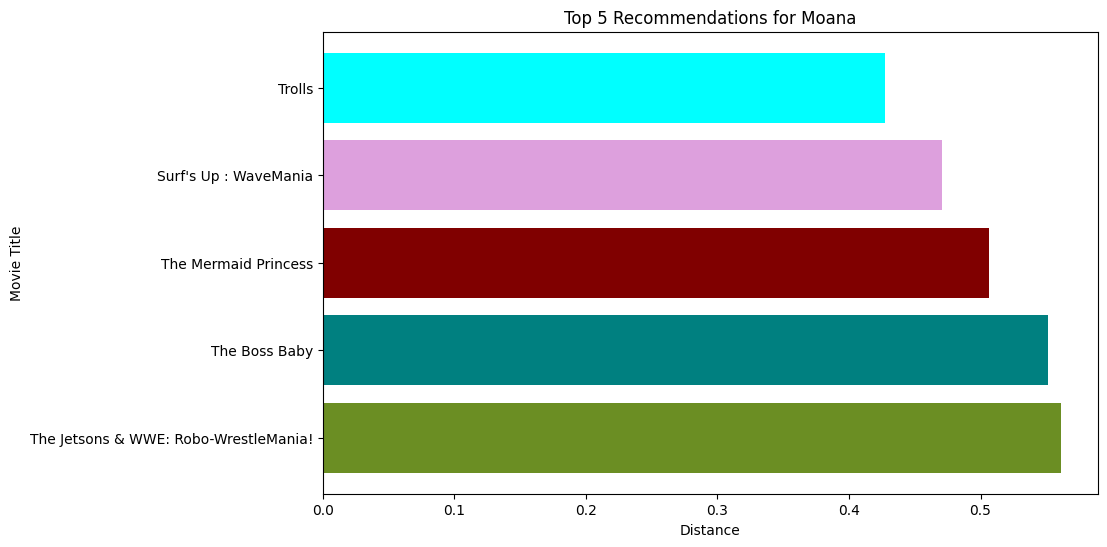

In [41]:
program_name = 'Moana'
recommendations = 5
custom_palette = ["aqua", "plum", "maroon", "teal", "olivedrab"]
query_index = np.random.choice(movie_features_df.shape[0])
distances, indices = model_knn.kneighbors(movie_features_df.iloc[movie_features_df_selection.index[movie_features_df_selection['program_name'] == program_name].tolist()[0],:].values.reshape(1, -1), n_neighbors=recommendations+1)
recommendation_labels = [movie_features_df.index[indices.flatten()[i]] for i in range(1, len(distances.flatten()))]
distances_values = [distances.flatten()[i] for i in range(1, len(distances.flatten()))]
plt.figure(figsize=(10, 6))
plt.barh(recommendation_labels, distances_values, color=custom_palette)
plt.xlabel('Distance')
plt.ylabel('Movie Title')
plt.title('Top {} Recommendations for {}'.format(recommendations, program_name))
plt.gca().invert_yaxis()


(-1.0999922915286922,
 1.0999996329299377,
 -1.0999942959917366,
 1.0999991132203486)

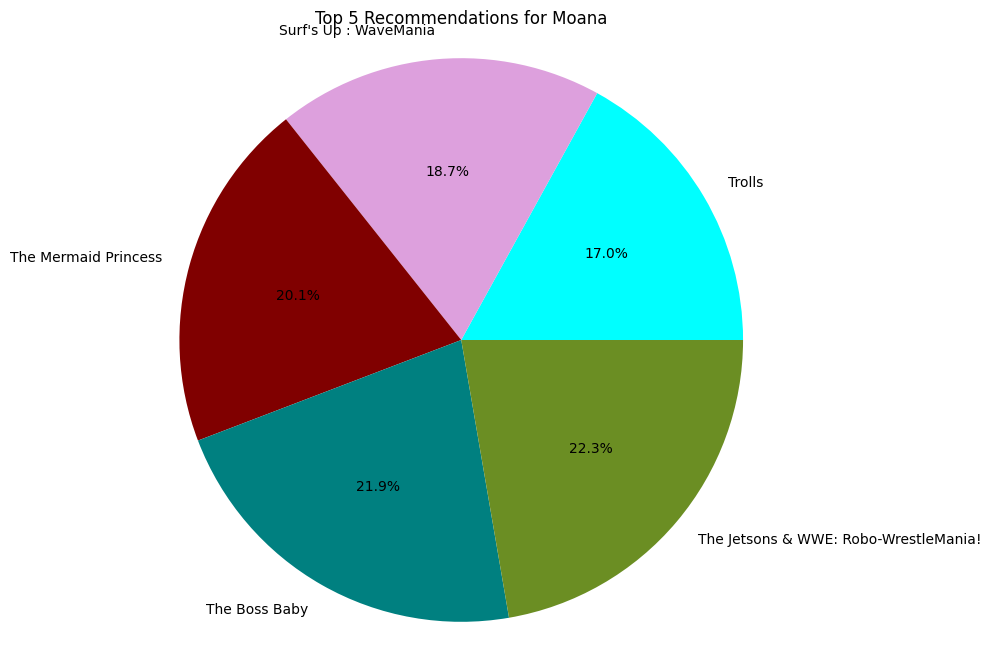

In [42]:
program_name = 'Moana'
recommendations = 5
custom_palette = ["aqua", "plum", "maroon", "teal", "olivedrab"]
query_index = np.random.choice(movie_features_df.shape[0])
distances, indices = model_knn.kneighbors(movie_features_df.iloc[movie_features_df_selection.index[movie_features_df_selection['program_name'] == program_name].tolist()[0],:].values.reshape(1, -1), n_neighbors=recommendations+1)
recommendation_labels = [movie_features_df.index[indices.flatten()[i]] for i in range(1, len(distances.flatten()))]
distances_values = [distances.flatten()[i] for i in range(1, len(distances.flatten()))]
plt.figure(figsize=(8, 8))
plt.pie(distances_values, labels=recommendation_labels, colors=custom_palette, autopct='%1.1f%%')
plt.title('Top {} Recommendations for {}'.format(recommendations, program_name))
plt.axis('equal')
